In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"        

In [2]:
#loading the libraries
from scipy.spatial import distance as dist
import numpy as np
import cv2
from fastai.vision import *
import time
import dlib
import os
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image
import matplotlib
%matplotlib inline
from icecream import ic
import fastai

In [3]:
os.getcwd()

'C:\\Users\\peddi\\DL files'

In [4]:
os.chdir('D:\Data science\Alma better\DL Facial emotion recognition\Images\images')

### **Resource link**:Images -> https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset

#### Reading and displaying the image using opencv

In [5]:
emojis1=cv2.imread('./train/surprise/52.jpg')
print(emojis1)

[[[226 226 226]
  [218 218 218]
  [221 221 221]
  [225 225 225]
  ...
  [212 212 212]
  [219 219 219]
  [230 230 230]
  [229 229 229]]

 [[223 223 223]
  [219 219 219]
  [224 224 224]
  [224 224 224]
  ...
  [210 210 210]
  [226 226 226]
  [226 226 226]
  [233 233 233]]

 [[222 222 222]
  [219 219 219]
  [225 225 225]
  [223 223 223]
  ...
  [207 207 207]
  [221 221 221]
  [220 220 220]
  [231 231 231]]

 [[214 214 214]
  [215 215 215]
  [222 222 222]
  [221 221 221]
  ...
  [201 201 201]
  [213 213 213]
  [223 223 223]
  [228 228 228]]

 ...

 [[231 231 231]
  [231 231 231]
  [204 204 204]
  [121 121 121]
  ...
  [226 226 226]
  [227 227 227]
  [225 225 225]
  [224 224 224]]

 [[232 232 232]
  [230 230 230]
  [177 177 177]
  [124 124 124]
  ...
  [225 225 225]
  [225 225 225]
  [225 225 225]
  [228 228 228]]

 [[237 237 237]
  [217 217 217]
  [136 136 136]
  [121 121 121]
  ...
  [228 228 228]
  [223 223 223]
  [220 220 220]
  [226 226 226]]

 [[236 236 236]
  [196 196 196]
  [117 117

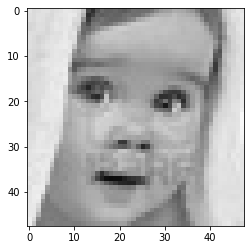

In [6]:
plt.imshow(emojis1)

#### Using Pillow to display an image

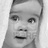

In [8]:
pil_img1=Image.open('./train/surprise/52.jpg')
pil_img1

#### Using matplotlib to display an image

In [9]:
mat_img1=matplotlib.image.imread("./train/surprise/52.jpg")
mat_img1

array([[226, 218, 221, 225, ..., 212, 219, 230, 229],
       [223, 219, 224, 224, ..., 210, 226, 226, 233],
       [222, 219, 225, 223, ..., 207, 221, 220, 231],
       [214, 215, 222, 221, ..., 201, 213, 223, 228],
       ...,
       [231, 231, 204, 121, ..., 226, 227, 225, 224],
       [232, 230, 177, 124, ..., 225, 225, 225, 228],
       [237, 217, 136, 121, ..., 228, 223, 220, 226],
       [236, 196, 117, 122, ..., 232, 222, 213, 216]], dtype=uint8)

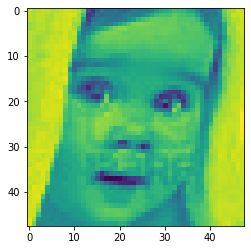

In [10]:
plt.imshow(mat_img1)

In [11]:
mat_img1.shape

(48, 48)

In [12]:
emojis1.shape

(48, 48, 3)

In [13]:
#analyzing image of matplotlib
#splitting array into three parts
b=emojis1[:,:,0] #red
g=emojis1[:,:,1] #green
r=emojis1[:,:,2] #blue

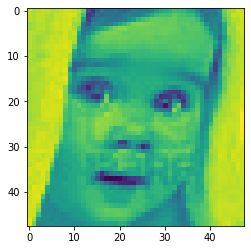

In [14]:
plt.imshow(b)

In [15]:
b.shape

(48, 48)

### Preparing the data for training the images using fastai

In [5]:
np.random.seed(42)
path_data = Path(os.getcwd() + '/train')
test_path='../validation'
data = ImageDataBunch.from_folder(path_data, train="train", valid="validation",classes=['angry','disgust','fear','happy','neutral','sad','surprise'],\
                                  ds_tfms=get_transforms(), size=224, num_workers=4,test=test_path).normalize(imagenet_stats)

In [6]:
data.valid_ds

LabelList (5699 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
happy,sad,angry,neutral,surprise
Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train

In [7]:
data.test_ds

LabelList (7066 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train

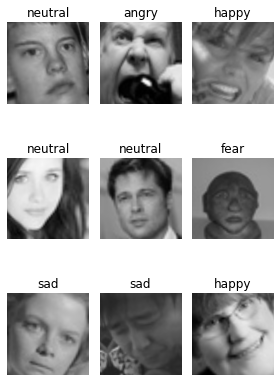

In [12]:
# display some of the images from the training directory
data.show_batch(rows=3,figsize=(4,6))

#### Target classes in the dataset

In [8]:
ic(data.classes);
ic(len(data.classes));
ic(data.c);

ic| data.classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
ic| len(data.classes): 7
ic| data.c: 7


#### Using learner method from Fastai for training
- More details : https://docs.fast.ai/vision.learner.html
- References: https://www.fast.ai/2020/02/13/fastai-A-Layered-API-for-Deep-Learning/

In [9]:
#Models available in fastai with transfer learning models
dir(fastai.vision.models)

['BasicBlock',
 'Darknet',
 'DynamicUnet',
 'ResLayer',
 'ResNet',
 'SqueezeNet',
 'UnetBlock',
 'WideResNet',
 'XResNet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'alexnet',
 'darknet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'mobilenet_v2',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'squeezenet1_0',
 'squeezenet1_1',
 'unet',
 'vgg11_bn',
 'vgg13_bn',
 'vgg16_bn',
 'vgg19_bn',
 'wrn',
 'wrn_22',
 'xception',
 'xresnet',
 'xresnet101',
 'xresnet152',
 'xresnet18',
 'xresnet18_deep',
 'xresnet34',
 'xresnet34_deep',
 'xresnet50',
 'xresnet50_deep']

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

- Smith discovered a new method for setting learning rate, named Cyclical Learning Rates (CLRs). Instead of using a fixed, or a decreasing learning rate, the CLR method allows learning rate to continuously oscillate between reasonable minimum and maximum bounds.
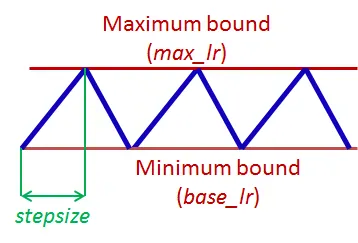
- CLRs are not computationally expensive and eliminate the need to find the best learning rate value—the optimal learning rate will fall somewhere between the minimum and maximum bounds. A cyclical learning rate produces better overall results, despite the fact that it might hinder the network performance temporarily.
Source: https://iconof.com/1cycle-learning-rate-policy/

In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.816228,1.517290,0.578874,2:16:42
1,1.479714,1.368795,0.518863,1:52:17
2,1.356588,1.238616,0.470960,1:28:46
3,1.278683,1.213324,0.463239,1:49:52


- If we only want to save the weights and load them up later. You can do that with learner.save and learner.load on an already instantiated learner instance.
- If we want to save and load the full learner with everything you had. Then you do learner.export then learner = load_learner.


In [23]:
learn.save('learn-1')

In [ ]:
#learn.load('learn-1')

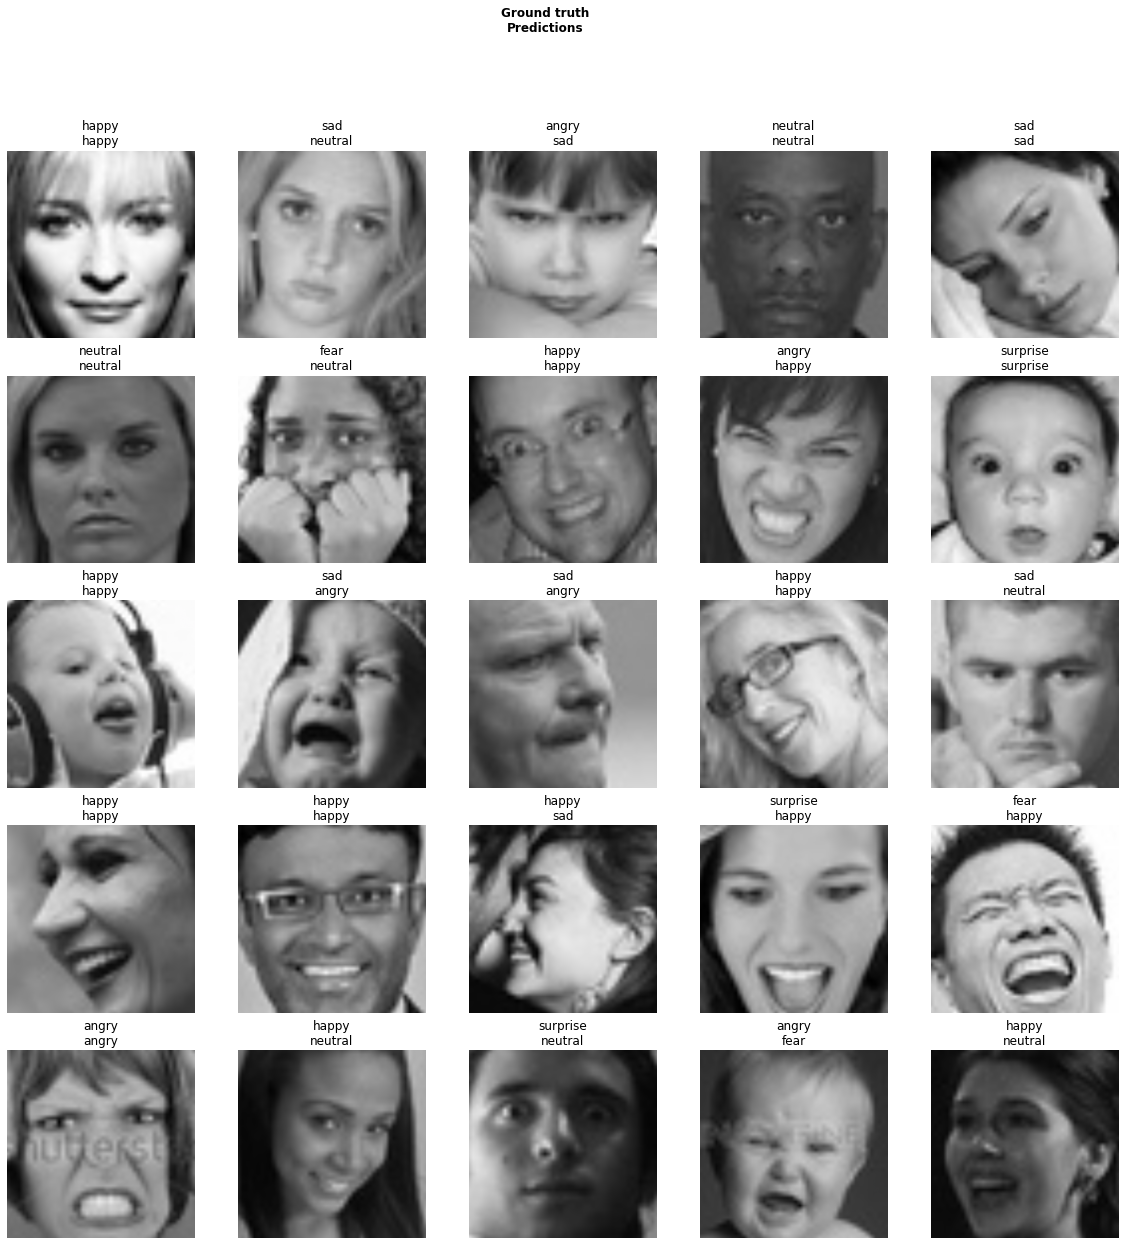

In [26]:
#Results from learn-1
learn.show_results()

In [28]:
learn.freeze_to(-2)

In [29]:
learn.unfreeze()

In [30]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


### Finding out the optimal learning rate
- Unfreeze is used for using complete dataset without leaving any other images behind.
- I used error_rate as the metric to optimize. There are many other metrics that can be used for optimizing the performance like accuracy, roc..etc
- After finding the optimal rate the model is trained for certain number of epochs until the error rate or the performance is not down.

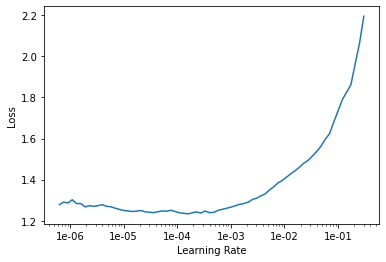

In [31]:
learn.recorder.plot()

In [22]:
print(40e-5>1e-3)

False


In [19]:
(1e-04+1e-03)/2

0.00055

In [63]:
learn.fit_one_cycle(3, max_lr=slice(1e-4,40e-5))

epoch,train_loss,valid_loss,error_rate,time
0,1.114985,1.024801,0.387261,2:19:18
1,0.989131,0.900986,0.330760,2:17:18
2,0.807616,0.838744,0.311985,1:39:18


In [64]:
learn.save('learn-2')

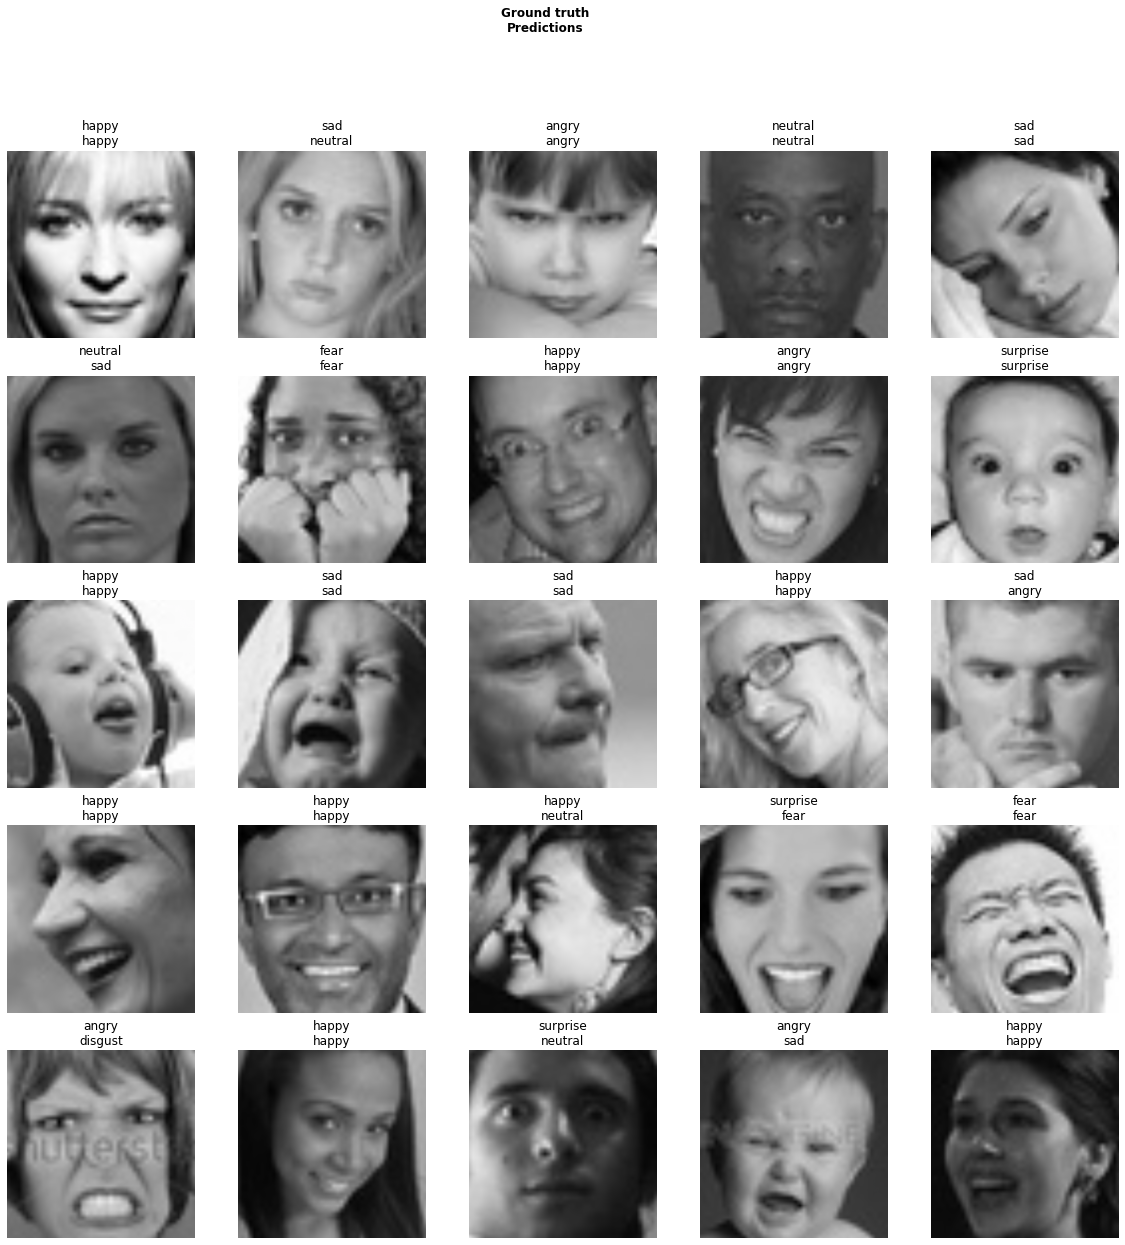

In [65]:
learn.show_results()

In [66]:
os.chdir('D:\Data science\Alma better\DL Facial emotion recognition\Images')

In [67]:
#learn.export(file=Path("/fastai_emojis_model2.pkl"))
#learn.export(file = Path("/kaggle/working/export.pkl"))
#this didn't work so the below code 

In [87]:
model2.export('fastai_emojis1_model2.pkl')

In [68]:
learn.fit_one_cycle(6, max_lr=slice(1e-4,40e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.822761,0.894750,0.336726,2:32:29
1,0.918400,0.917328,0.339182,1:44:20
2,0.841517,0.894224,0.325847,2:16:46
3,0.733908,0.834736,0.302685,2:25:59
4,0.582461,0.833552,0.294613,2:25:40
5,0.484518,0.840969,0.288998,2:33:37


In [69]:
learn.save('learn-3')

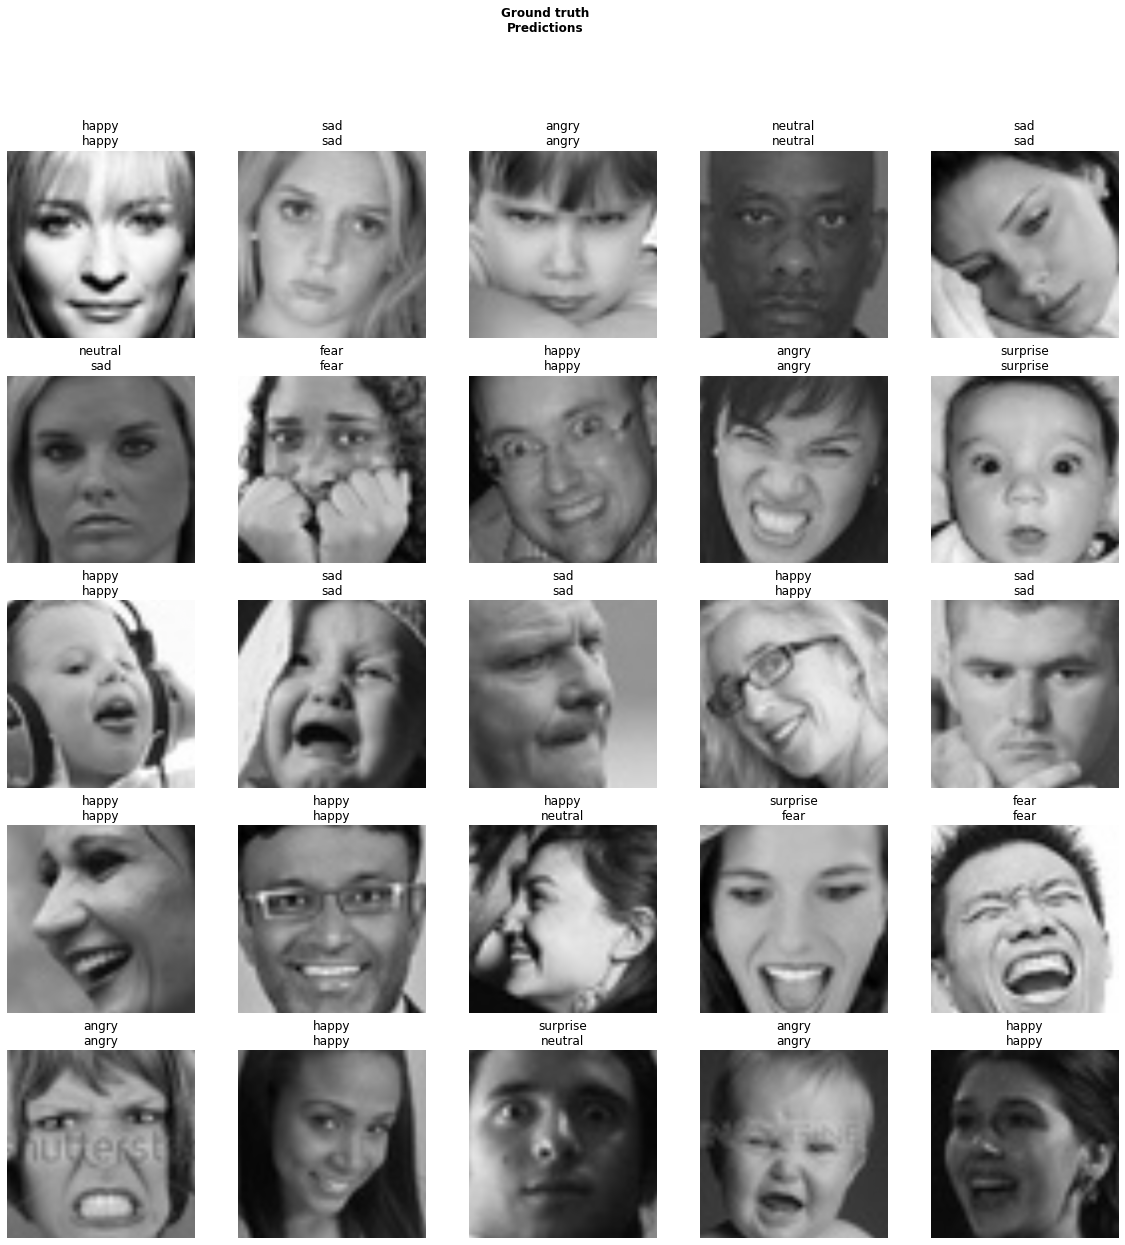

In [70]:
learn.show_results()

In [78]:
os.chdir('D:\Data science\Alma better\DL Facial emotion recognition\Images')

In [79]:
learn.export('fastai_emojis_model3.pkl')

In [103]:
learn.export()

In [23]:
learn.unfreeze()

In [27]:
learn.load('learn-3')

Learner(data=ImageDataBunch;

Train: LabelList (22799 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
angry,angry,angry,angry,angry
Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Valid: LabelList (5699 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
happy,sad,angry,neutral,surprise
Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Test: LabelList (7066 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentu

In [29]:
learn.fit_one_cycle(3, max_lr=slice(1e-4,40e-5), callbacks=[callbacks.SaveModelCallback(learn,every='epoch',\
                                                                                            monitor='error_rate',name='callback_model3')])

epoch,train_loss,valid_loss,error_rate,time
0,0.742474,0.793938,0.284611,4:16:12
1,0.677608,0.735303,0.271802,3:24:10
2,0.473517,0.702031,0.242850,3:14:00


- Tracking and saving the performance in every epoch
- It can be seen that the error rate has drastically decreased from 57% to 24%
- Also learn-5 stage gives less residual state then there is some overfitting happened with train and validation set so I have chosen learn-4 which is having almost the same accuracy and error rate.
#### The accuracy of this model is 75.715%

In [30]:
learn.save('learn-4')

In [34]:
learn.export('fastai_emojis_model4.pkl')

In [12]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(5, max_lr=slice(1e-4,40e-5),start_epoch=3, callbacks=[callbacks.SaveModelCallback(learn,every='epoch',\
                                                                                            monitor='error_rate',name='callback_model3')])

Loaded callback_model3_2


epoch,train_loss,valid_loss,error_rate,time
3,0.479470,0.711409,0.242148,2:13:16
4,0.363672,0.713719,0.236533,2:14:55


In [15]:
learn.save('learn-5')

### Results from model1, model2, model3 and model4 using fastai transfer learning

#### Model-1

In [49]:
model1=learn.load('learn-1')
model1

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x000001CC25B77430>
Traceback (most recent call last):
  File "C:\Users\peddi\anaconda3\envs\face_emotion_recog\lib\site-packages\torch\utils\data\dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "C:\Users\peddi\anaconda3\envs\face_emotion_recog\lib\site-packages\torch\utils\data\dataloader.py", line 1291, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


Learner(data=ImageDataBunch;

Train: LabelList (22800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
angry,angry,angry,angry,angry
Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Valid: LabelList (5699 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
happy,sad,angry,neutral,sad
Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_si

In [50]:
type(model1)

fastai.basic_train.Learner

In [51]:
results1 = ClassificationInterpretation.from_learner(model1)

In [52]:
results1

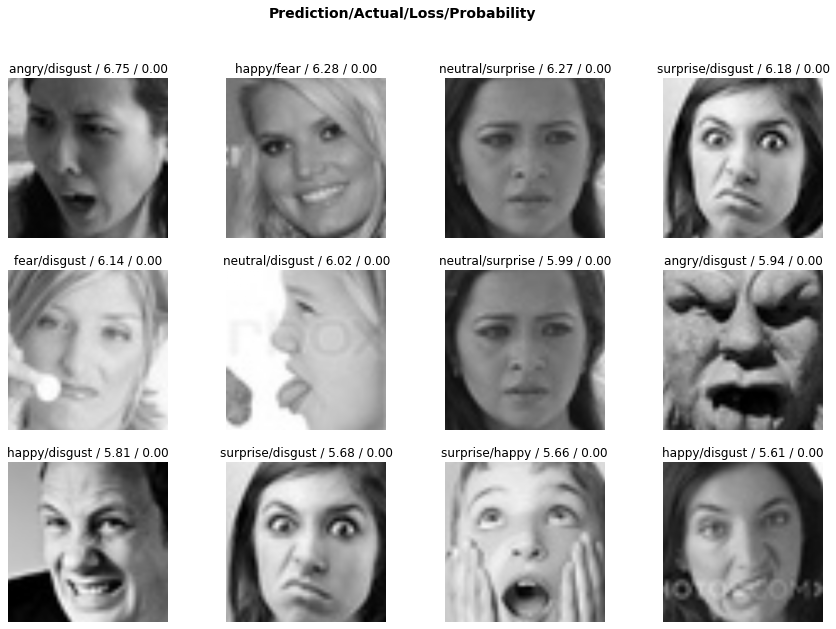

In [58]:
results1.plot_top_losses(12, figsize=(15,10), heatmap=False)

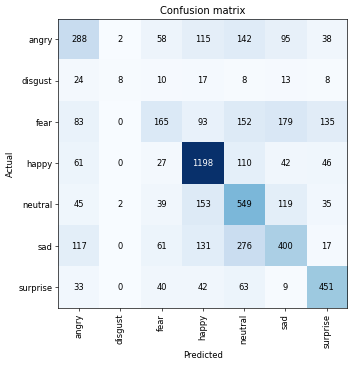

In [62]:
results1.plot_confusion_matrix(figsize=(8,6), dpi=60)

#### Model-2

In [81]:
model2=learn.load('learn-2')
model2

Learner(data=ImageDataBunch;

Train: LabelList (22800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
angry,angry,angry,angry,angry
Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Valid: LabelList (5699 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
happy,sad,angry,neutral,sad
Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_si

In [82]:
results2 = ClassificationInterpretation.from_learner(model2)

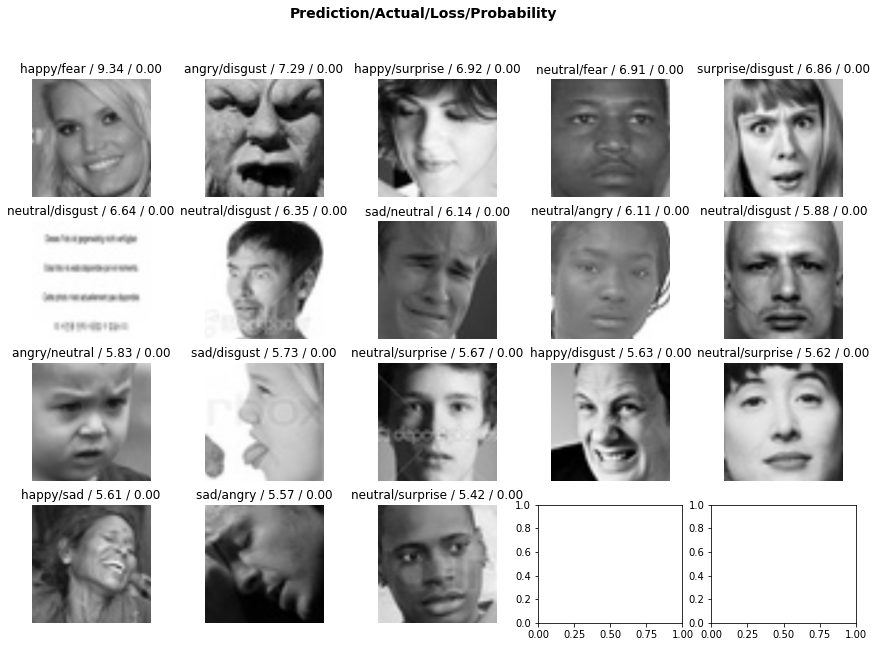

In [86]:
results2.plot_top_losses(18, figsize=(15,10), heatmap=False)

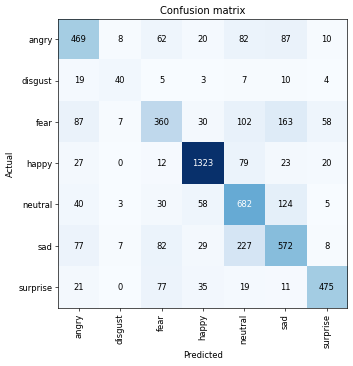

In [84]:
results2.plot_confusion_matrix(figsize=(8,6), dpi=60)

#### Model-3

In [71]:
model3=learn.load('learn-3')
model3

Learner(data=ImageDataBunch;

Train: LabelList (22800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
angry,angry,angry,angry,angry
Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Valid: LabelList (5699 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
happy,sad,angry,neutral,sad
Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_si

In [72]:
type(model3)

fastai.basic_train.Learner

In [74]:
results3 = ClassificationInterpretation.from_learner(model3)

In [75]:
results3

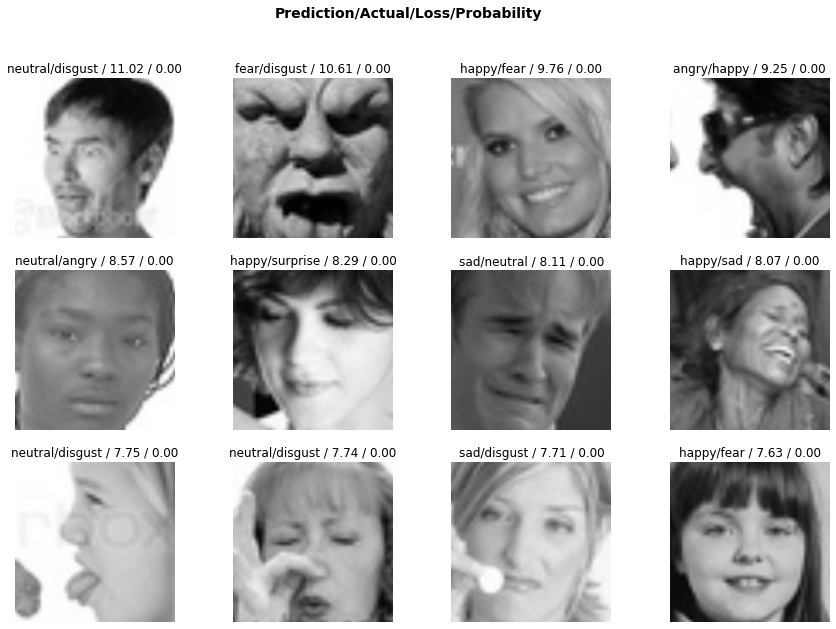

In [76]:
results3.plot_top_losses(12, figsize=(15,10), heatmap=False)

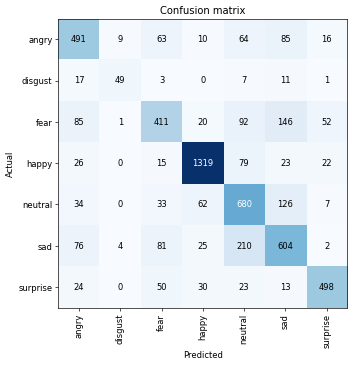

In [77]:
results3.plot_confusion_matrix(figsize=(8,6), dpi=60)

### Model-4 - The chosen state 

In [31]:
model4=learn.load('learn-4')
model4

Learner(data=ImageDataBunch;

Train: LabelList (22799 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
angry,angry,angry,angry,angry
Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Valid: LabelList (5699 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
happy,sad,angry,neutral,surprise
Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Test: LabelList (7066 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentu

In [32]:
results4 = ClassificationInterpretation.from_learner(model4)

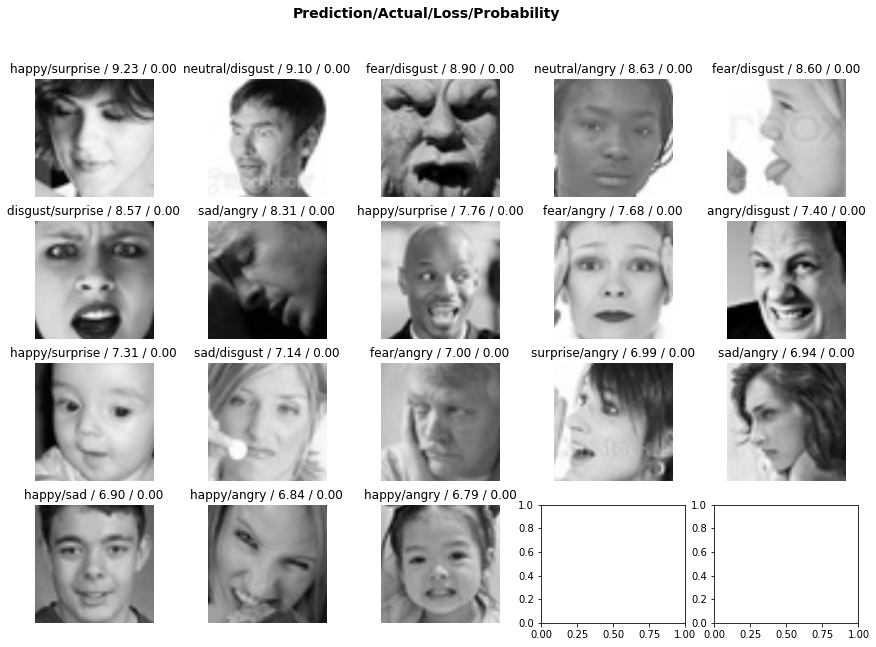

In [35]:
results4.plot_top_losses(18, figsize=(15,10), heatmap=False)

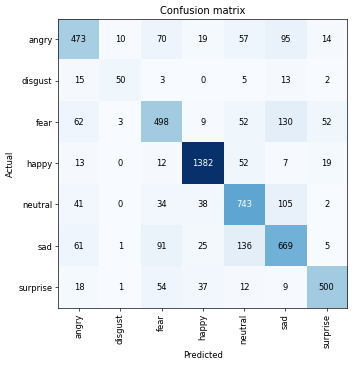

In [36]:
results4.plot_confusion_matrix(figsize=(8,6), dpi=60)

### Some predictions 

In [93]:
os.getcwd()

'D:\\Data science\\Alma better\\DL Facial emotion recognition\\Images\\images'

In [7]:
from fastai import *
from fastai.vision import *
from fastai.vision import image

In [8]:
os.chdir(r'D:\Data science\Alma better\DL Facial emotion recognition\Images\images')

In [9]:
model3_test=load_learner(path=r"D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train",file='export.pkl')

In [10]:
model3_test.data

ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Test: None

In [12]:
import cv2
import os
os.chdir(r'D:\Data science\Alma better\DL Facial emotion recognition\Images\images\validation\surprise')

In [17]:
test1=cv2.imread('./3756.jpg')
t = pil2tensor(test1, dtype=np.float32) # converts to numpy tensor
#t = t.permute(2,0,1) # Move num_channels as first dimension
im = Image(t) # Convert to fastAi Image - this class has "apply_tfms" 
model3_test.predict(im)

(Category tensor(0),
 tensor(0),
 tensor([9.9617e-01, 0.0000e+00, 5.2409e-43, 0.0000e+00, 1.6755e-03, 2.1535e-03,
         0.0000e+00]))

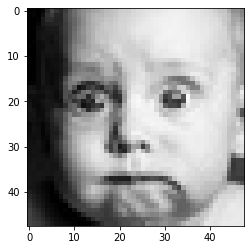

In [18]:
plt.imshow(test1)

In [19]:
os.chdir('D:\\Data science\\Alma better\\DL Facial emotion recognition\\Images\\images\\validation\\')

In [22]:
path=os.getcwd()

In [23]:
path

'D:\\Data science\\Alma better\\DL Facial emotion recognition\\Images\\images\\validation'

In [163]:
test_img1.shape

(48, 48, 3)

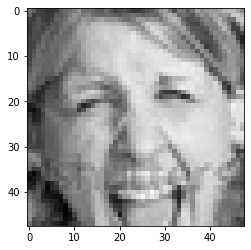

In [164]:
plt.imshow(test_img1)

In [168]:
os.getcwd()

'D:\\Data science\\Alma better\\DL Facial emotion recognition\\Images\\images'

In [184]:
model3_test.get_preds

<bound method Learner.get_preds of Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_siz

In [186]:
model3_test.data

ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: D:\Data science\Alma better\DL Facial emotion recognition\Images\images\train;

Test: None

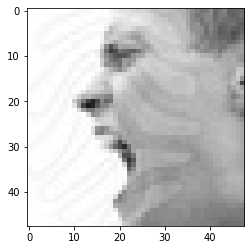

In [172]:
path='./2357.jpg'
img=cv2.imread(path)
plt.imshow(img)

## Conclusion:
- The accuracy of this model came up to 76% then there are some challenges because of which there was more error rate here. They are some of the images are misclassified. Eventhough I have cleaned some images as there are more than 3000+ images in each category it was difficult to check every image.
- So there may be some images where it has was not correctly labelled and also training for some more epochs would increase the accuracy.
- May be using resenet50 or more advanced algorithm would yield greater accuracy then it requires greater computational power and time to use them. 
- **Inspite of all these when tested with new images or videos the detection was very good and accurate**.
- Some of the detected images and videos results are provided in the pipeline notebook. 😊